## GRIP April 22': THE SPARKS FOUNDATION
 Data Science & Business Analytics Intern

### Task 3 : Exploratory Data Analysis -  Retail

- Perform Exploratory Data Analysis on dataset: 'SampleSuperstore'.
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?
- Dataset:- SampleSuperstore.csv(https://bit.ly/3i4rbWl)

#### By KUNAL  JAGTAP

In [66]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Importing the dataset
store_df = pd.read_csv('SampleSuperstore.csv')
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Defining the dataset

In [8]:
store_df.shape

(9994, 13)

Thus, we have 9994 rows and 13 columns in the dataset

In [9]:
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
#Finding missing values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

So, as we can see we have no null values in the dataset

In [12]:
#Finding the unique values  
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [64]:
#dropping redundant data
store_df.drop(['Country', 'Postal Code'], axis = 1, inplace = True)

In [65]:
#Describing the data
store_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## UNIVARIATE ANALYSIS:-

#### a)Shipping Mode Preference

In [14]:
(store_df['Ship Mode'].value_counts()/store_df.shape[0])*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

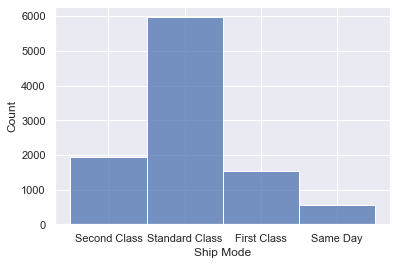

In [15]:
sns.histplot(store_df['Ship Mode'])

- Thus, 'Standard Class' shipping mode is highly preferred whereas 'Same Day' is least preferred


#### b)Segments

In [16]:
(store_df['Segment'].value_counts()/store_df.shape[0])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Count'>

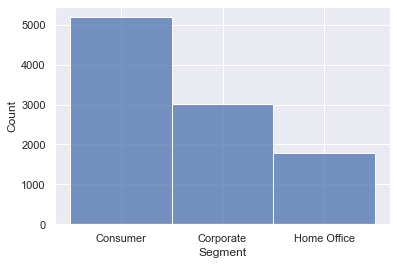

In [17]:
sns.histplot(store_df['Segment'])

- More than 50% of people belong to consumer class whereas 20-30% people belong to Home Office & Corporate

#### c)Categories

In [18]:
(store_df['Category'].value_counts()/store_df.shape[0])*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Count'>

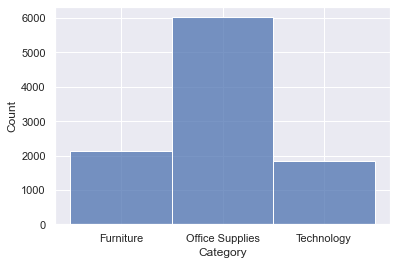

In [19]:
sns.histplot(store_df['Category'])

- 60% of the Categories belong to Office Supplies whereas approximately 18 - 20% of Categories belongs to Furniture and Technology

#### d)Sub-categorical preferences

In [21]:
(store_df['Sub-Category'].value_counts()/store_df.shape[0])*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

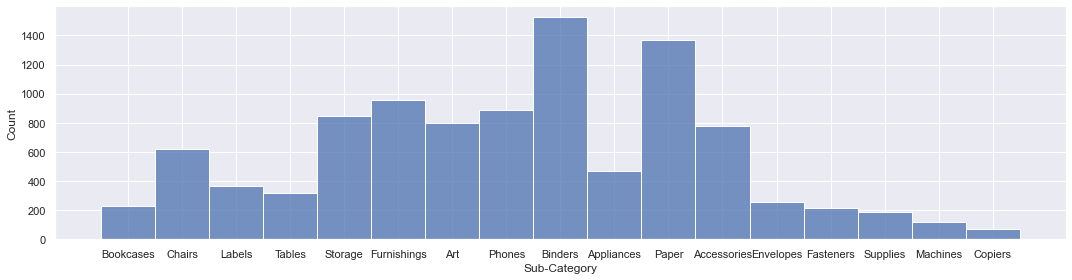

In [32]:
sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(15,4)
plt.tight_layout()

- Binders and Papers are most in demand sub-categories 

## BIVARIATE ANALYSIS

#### a)Category wise sales & profit

<AxesSubplot:xlabel='Category'>

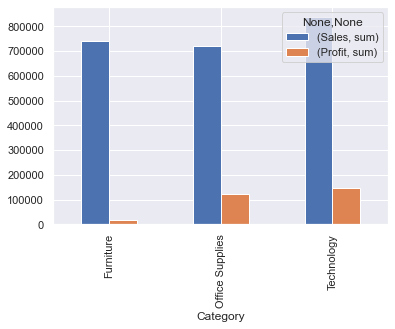

In [33]:
store_df.groupby('Category')[['Sales', 'Profit']].agg(['sum']).plot.bar()

* Techology Products has the highest Sales and Profit
- Furniture has moderate Sales but less Profit
- Office Suplies has the lowest Sales but moderate Profit

#### b)Region-wise sales & profit

<AxesSubplot:xlabel='Region', ylabel='count'>

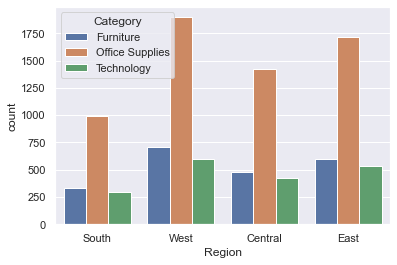

In [35]:
sns.countplot(x=store_df['Region'], hue = store_df['Category'])

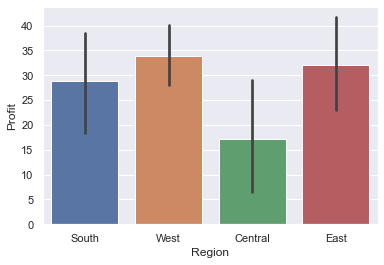

In [40]:
sns.barplot(x='Region',y='Profit',data=store_df)
plt.show()

- West region has highest sales in all the three catogories, followed by East, Central and lowest in South
- Profit was more in the West as well as East region and less in Central region.

#### c)Segment-wise sales & profit

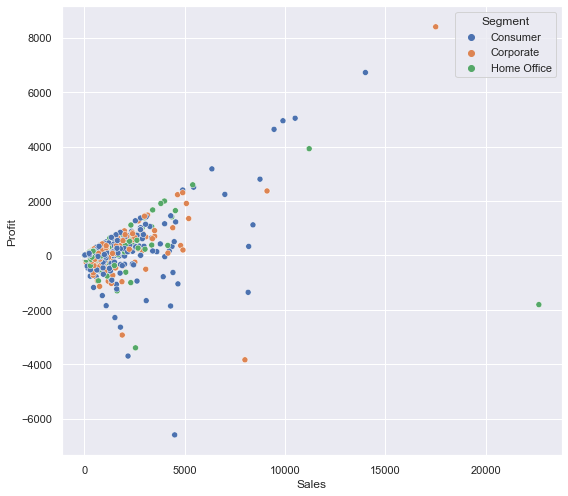

In [38]:
sns.scatterplot(store_df['Sales'], store_df['Profit'], hue = store_df['Segment'])
plt.gcf().set_size_inches(8,7)
plt.tight_layout()

- More Profit is in Consumer Segment
- Less Profit in Home Office Segment
- Also, at lower sales, a company either gets profit or loss. But, when the sales are high, a company mostly gets profit.

### Analysis Using Pair Plot of each Column:-

1. Based on Category

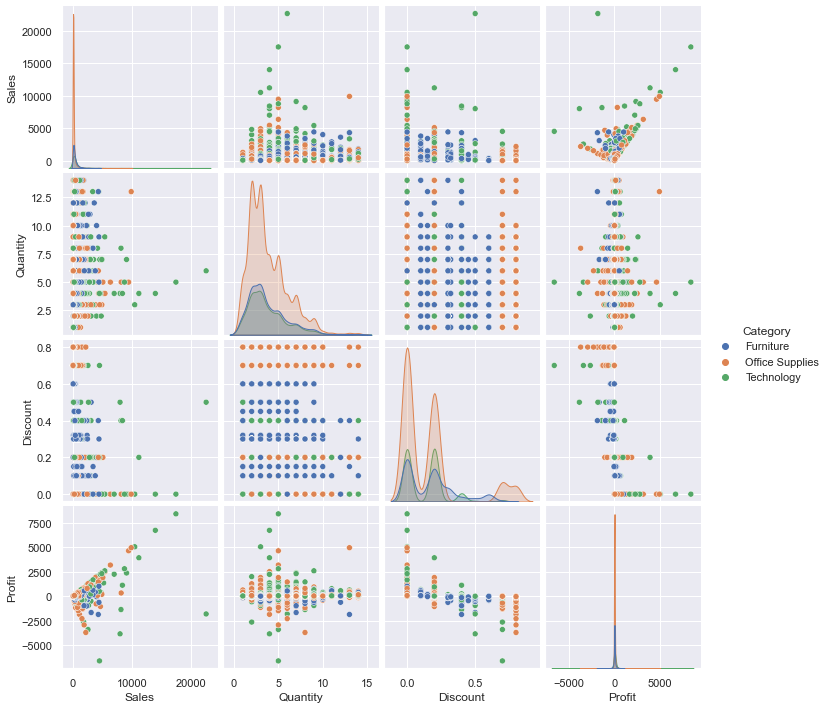

In [69]:
sns.pairplot(store_df, hue='Category')

2. Based on region

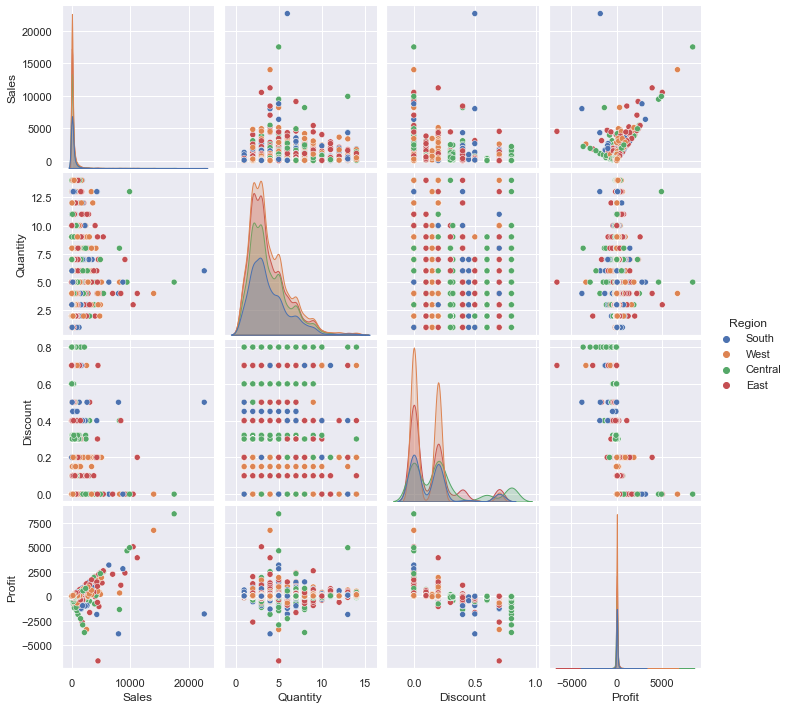

In [70]:
sns.pairplot(store_df, hue='Region')

In [68]:
#Checking correlation
store_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


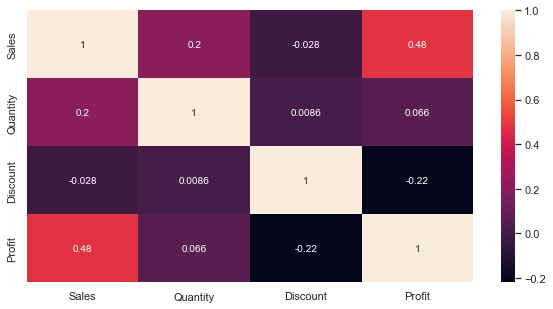

In [67]:
#Checking correlation by heatmap
fig, axes=plt.subplots(1,1, figsize=(10,5))
sns.heatmap(store_df.corr(), annot=True)
plt.show()

Heatmap elaborates:

- Sales and Profit are positively related 
- Discount and Profit are negatively related 

### Now, As a business manager, try to find out the weak areas where you can work to make more profit.

In [54]:
store_df.pivot_table(values =  'Profit', index = 'Segment', columns = 'Discount', aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


In [55]:
store_df.pivot_table(values =  'Sales', index = 'Segment', columns = 'Discount', aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

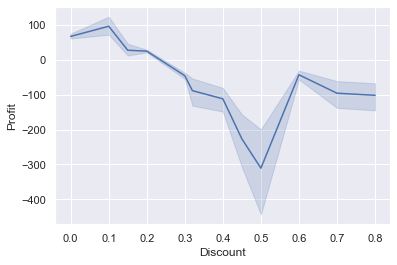

In [63]:
sns.lineplot(store_df['Discount'], store_df['Profit'])

- Thus, for discount more than 30%, the superstore was going on loss

- For discount between 0-20%, sales was average but It was gaining the profit

## Conclusion :
- When discount > 30% in a segment,it would result in loss whereas when discount<30%, the particular segment is making profit.
- We should limit the sales of furniture and increase that of office supplies and technology as furniture is generating very less profit as compared to its sales.
- The sales and profit in Southern and Central region are less so we should give more incentives like discount in these states in order to increase sales, hence profit will increase.
- The mode of shipping doesn't affect much to the sales.
- The Home Office provides highest sales followed by Corporate by a slight variation

# THANKYOU